In [1]:
# ANÁLISE DE VENDAS - E-COMMERCE BRASILEIRO (OLIST)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("="*60)
print("ANÁLISE DE VENDAS - E-COMMERCE BRASILEIRO")
print("="*60)
print("✓ Bibliotecas carregadas!")

ANÁLISE DE VENDAS - E-COMMERCE BRASILEIRO
✓ Bibliotecas carregadas!


In [2]:
print("\n[1] Carregando dados...")
path = '../data/'

orders = pd.read_csv(path + 'olist_orders_dataset.csv')
order_items = pd.read_csv(path + 'olist_order_items_dataset.csv')
products = pd.read_csv(path + 'olist_products_dataset.csv')
payments = pd.read_csv(path + 'olist_order_payments_dataset.csv')

print(f"✓ Pedidos: {len(orders):,}")
print(f"✓ Itens: {len(order_items):,}")
print(f"✓ Produtos: {len(products):,}")


[1] Carregando dados...
✓ Pedidos: 99,441
✓ Itens: 112,650
✓ Produtos: 32,951


In [3]:
print("\n[2] Preparando dados...")

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['year'] = orders['order_purchase_timestamp'].dt.year
orders['month'] = orders['order_purchase_timestamp'].dt.month
orders['month_name'] = orders['order_purchase_timestamp'].dt.strftime('%B')
orders['quarter'] = orders['order_purchase_timestamp'].dt.quarter
orders['day_of_week'] = orders['order_purchase_timestamp'].dt.day_name()

orders_delivered = orders[orders['order_status'] == 'delivered'].copy()
print(f"✓ Pedidos entregues: {len(orders_delivered):,}")


[2] Preparando dados...
✓ Pedidos entregues: 96,478


In [4]:
df = order_items.merge(orders_delivered, on='order_id', how='inner')
df = df.merge(products, on='product_id', how='left')
df = df.merge(payments.groupby('order_id')['payment_value'].sum().reset_index(), on='order_id', how='left')

df['revenue'] = df['price'] + df['freight_value']
df['profit_margin'] = ((df['price'] - df['freight_value']) / df['price'] * 100).clip(0, 100)

print(f"✓ Dataset final: {len(df):,} registros")
display(df.head())

✓ Dataset final: 110,197 registros


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_value,revenue,profit_margin
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,58.0,598.0,4.0,650.0,28.0,9.0,14.0,72.19,72.19,77.436333
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,259.83,259.83,91.692372
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,216.87,216.87,91.020101
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,42.0,480.0,1.0,200.0,16.0,10.0,15.0,25.78,25.78,1.539646
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,218.04,218.04,90.925463


In [5]:
print("\n[3] Calculando KPIs...")

total_revenue = df['revenue'].sum()
total_orders = df['order_id'].nunique()
avg_ticket = total_revenue / total_orders
total_products = df['product_id'].nunique()

print(f"\n📊 RESUMO GERAL:")
print(f"   • Faturamento: R$ {total_revenue:,.2f}")
print(f"   • Pedidos: {total_orders:,}")
print(f"   • Ticket Médio: R$ {avg_ticket:.2f}")
print(f"   • Produtos: {total_products:,}")


[3] Calculando KPIs...

📊 RESUMO GERAL:
   • Faturamento: R$ 15,419,773.75
   • Pedidos: 96,478
   • Ticket Médio: R$ 159.83
   • Produtos: 32,216



[4] Analisando sazonalidade...


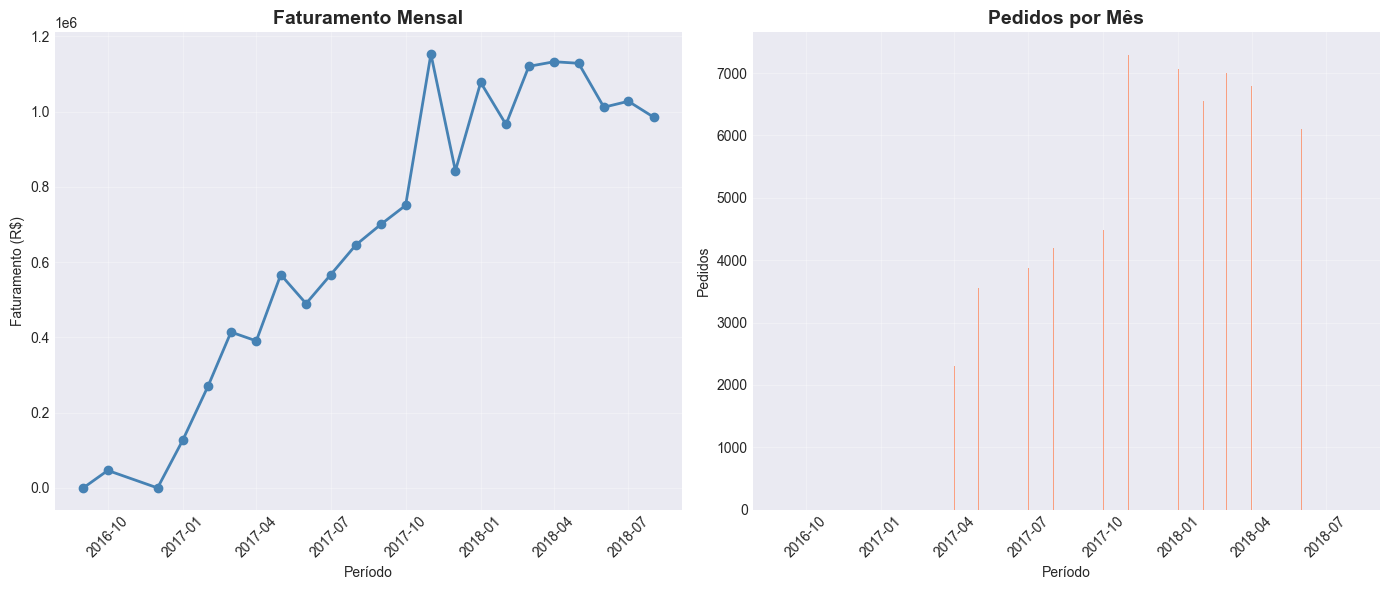

✓ Salvo: outputs/sazonalidade.png


In [6]:
print("\n[4] Analisando sazonalidade...")

monthly_sales = df.groupby(['year', 'month']).agg({
    'revenue': 'sum',
    'order_id': 'nunique'
}).reset_index()

monthly_sales['month_year'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(day=1))

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(monthly_sales['month_year'], monthly_sales['revenue'], marker='o', linewidth=2, color='steelblue')
plt.title('Faturamento Mensal', fontsize=14, fontweight='bold')
plt.xlabel('Período')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.bar(monthly_sales['month_year'], monthly_sales['order_id'], alpha=0.7, color='coral')
plt.title('Pedidos por Mês', fontsize=14, fontweight='bold')
plt.xlabel('Período')
plt.ylabel('Pedidos')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/sazonalidade.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Salvo: outputs/sazonalidade.png")


[5] Produtos mais rentáveis...

🏆 TOP 10 CATEGORIAS:


,revenue,order_id,profit_margin
product_category_name,,,
beleza_saude,1412089.53,8647,72.338090
relogios_presentes,1264333.12,5495,83.046738
cama_mesa_banho,1225209.26,9272,72.324025
esporte_lazer,1118256.91,7530,71.800312
informatica_acessorios,1032723.77,6530,71.540945
moveis_decoracao,880329.92,6307,66.928100
utilidades_domesticas,758392.25,5743,63.399705
cool_stuff,691680.89,3559,78.558150
automotivo,669454.75,3810,69.301197


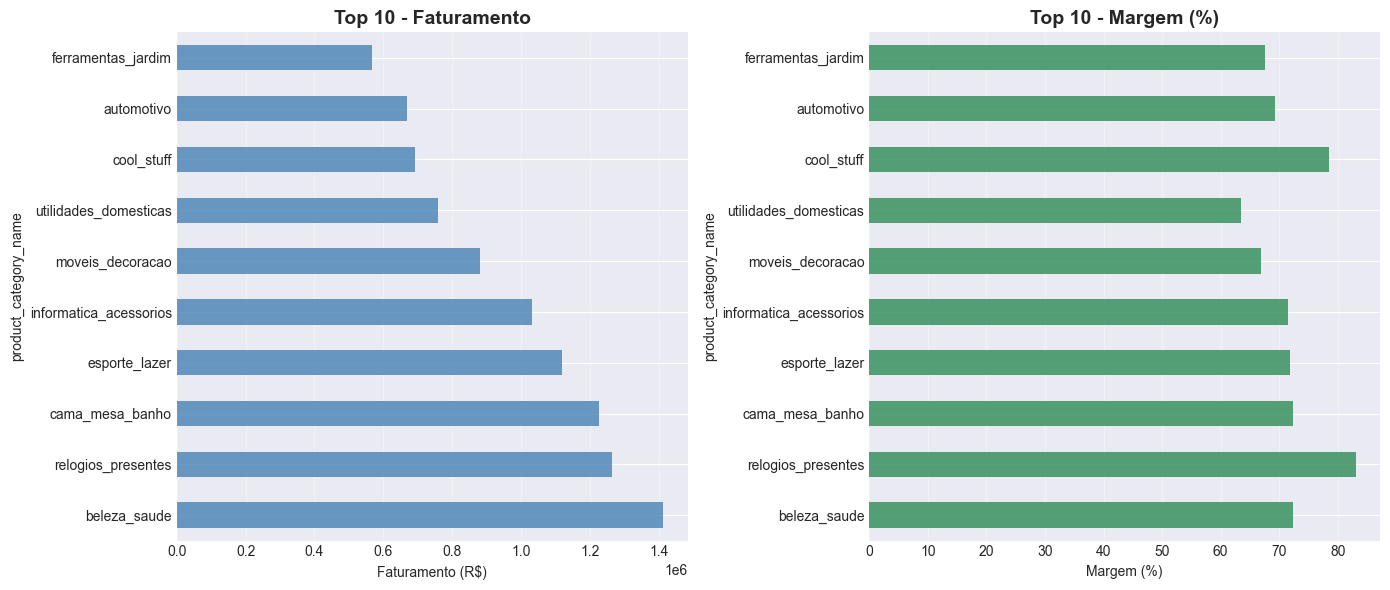

✓ Salvo: outputs/produtos_rentaveis.png


In [7]:
print("\n[5] Produtos mais rentáveis...")

top_categories = df.groupby('product_category_name').agg({
    'revenue': 'sum',
    'order_id': 'nunique',
    'profit_margin': 'mean'
}).sort_values('revenue', ascending=False).head(10)

print("\n🏆 TOP 10 CATEGORIAS:")
display(top_categories)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
top_categories['revenue'].plot(kind='barh', color='steelblue', alpha=0.8)
plt.title('Top 10 - Faturamento', fontsize=14, fontweight='bold')
plt.xlabel('Faturamento (R$)')
plt.grid(axis='x', alpha=0.3)

plt.subplot(1, 2, 2)
top_categories['profit_margin'].plot(kind='barh', color='seagreen', alpha=0.8)
plt.title('Top 10 - Margem (%)', fontsize=14, fontweight='bold')
plt.xlabel('Margem (%)')
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/produtos_rentaveis.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Salvo: outputs/produtos_rentaveis.png")


[6] Análise por dia...


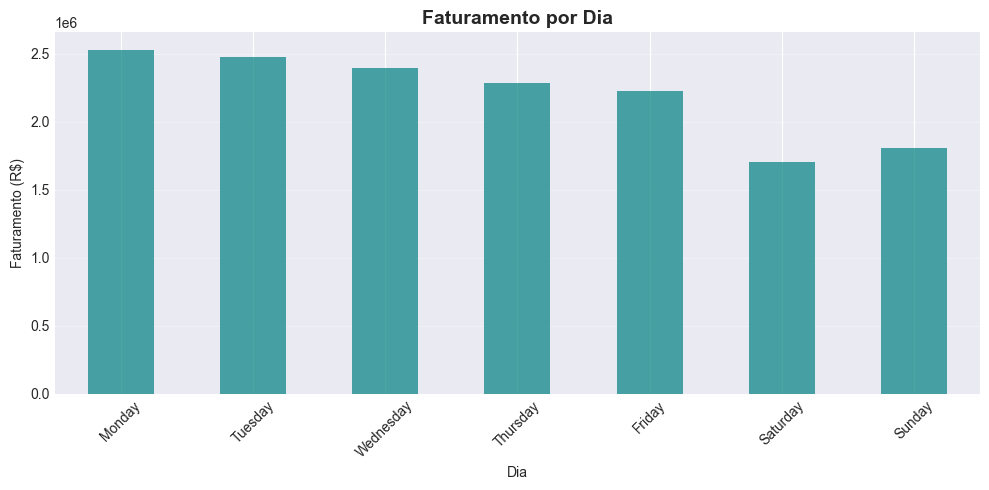

day_of_week
Monday       2530094.03
Tuesday      2473688.63
Wednesday    2396255.54
Thursday     2283871.03
Friday       2222443.15
Saturday     1705802.70
Sunday       1807618.67
Name: revenue, dtype: float64

In [8]:
print("\n[6] Análise por dia...")

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales = df.groupby('day_of_week')['revenue'].sum().reindex(weekday_order)

plt.figure(figsize=(10, 5))
weekday_sales.plot(kind='bar', color='teal', alpha=0.7)
plt.title('Faturamento por Dia', fontsize=14, fontweight='bold')
plt.xlabel('Dia')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

display(weekday_sales)


[7] Criando dashboards interativos...


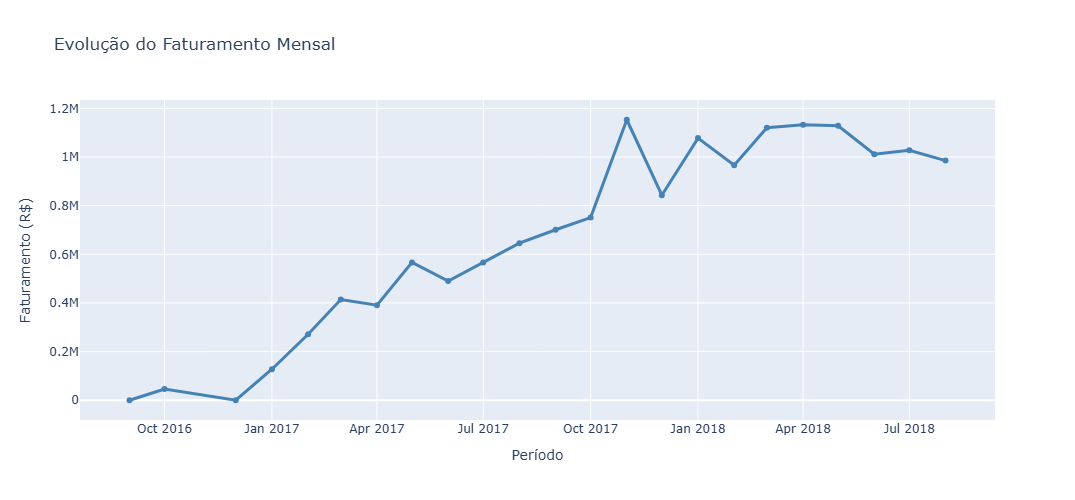

✓ Salvo: outputs/dashboard_evolucao.html


In [9]:
print("\n[7] Criando dashboards interativos...")

fig1 = px.line(monthly_sales, x='month_year', y='revenue',
               title='Evolução do Faturamento Mensal',
               labels={'revenue': 'Faturamento (R$)', 'month_year': 'Período'},
               markers=True)
fig1.update_traces(line_color='steelblue', line_width=3)
fig1.update_layout(hovermode='x unified', height=500)
fig1.write_html('../outputs/dashboard_evolucao.html')
fig1.show()
print("✓ Salvo: outputs/dashboard_evolucao.html")

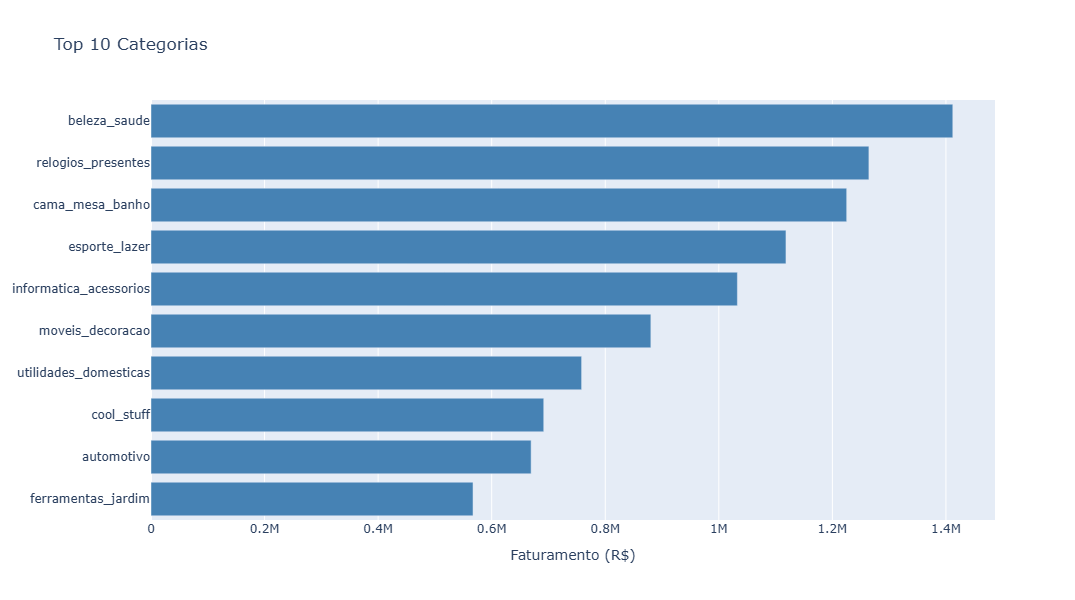

✓ Salvo: outputs/dashboard_categorias.html


In [10]:
top_cat_df = top_categories.reset_index().head(10)

fig2 = go.Figure()
fig2.add_trace(go.Bar(
    x=top_cat_df['revenue'],
    y=top_cat_df['product_category_name'],
    orientation='h',
    marker=dict(color='steelblue')
))

fig2.update_layout(
    title='Top 10 Categorias',
    xaxis_title='Faturamento (R$)',
    height=600,
    yaxis={'categoryorder': 'total ascending'}
)
fig2.write_html('../outputs/dashboard_categorias.html')
fig2.show()
print("✓ Salvo: outputs/dashboard_categorias.html")

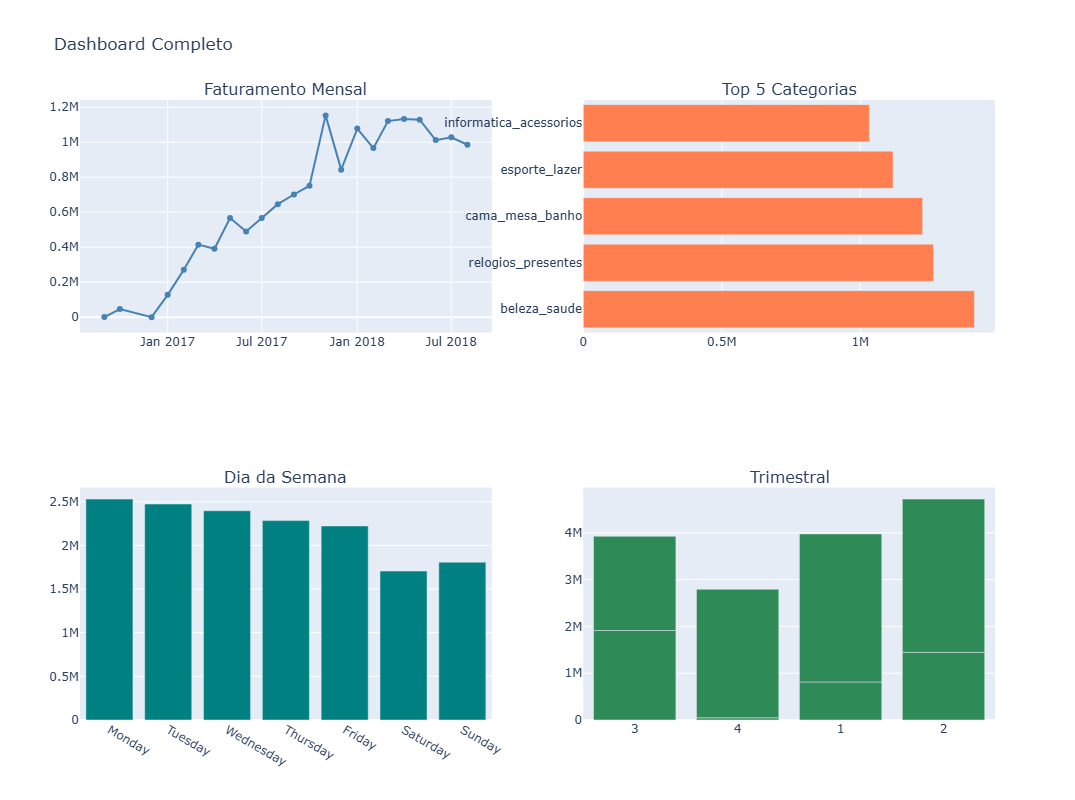

✓ Salvo: outputs/dashboard_completo.html


In [11]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Faturamento Mensal', 'Top 5 Categorias', 
                    'Dia da Semana', 'Trimestral')
)

fig.add_trace(go.Scatter(x=monthly_sales['month_year'], y=monthly_sales['revenue'],
               mode='lines+markers', line=dict(color='steelblue', width=2)), row=1, col=1)

top5 = top_categories.head(5).reset_index()
fig.add_trace(go.Bar(x=top5['revenue'], y=top5['product_category_name'],
               orientation='h', marker=dict(color='coral')), row=1, col=2)

fig.add_trace(go.Bar(x=weekday_sales.index, y=weekday_sales.values,
               marker=dict(color='teal')), row=2, col=1)

quarterly = df.groupby(['year', 'quarter'])['revenue'].sum().reset_index()
fig.add_trace(go.Bar(x=quarterly['quarter'].astype(str), y=quarterly['revenue'],
               marker=dict(color='seagreen')), row=2, col=2)

fig.update_layout(height=800, showlegend=False, title_text="Dashboard Completo")
fig.write_html('../outputs/dashboard_completo.html')
fig.show()
print("✓ Salvo: outputs/dashboard_completo.html")

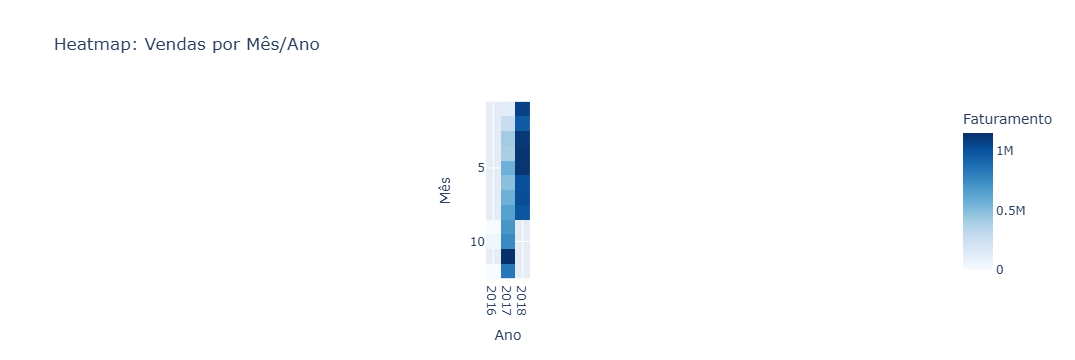

✓ Salvo: outputs/heatmap_vendas.html


In [12]:
pivot = df.groupby(['year', 'month'])['revenue'].sum().reset_index().pivot(index='month', columns='year', values='revenue')

fig = px.imshow(pivot, 
                labels=dict(x="Ano", y="Mês", color="Faturamento"),
                title="Heatmap: Vendas por Mês/Ano",
                color_continuous_scale='Blues')
fig.write_html('../outputs/heatmap_vendas.html')
fig.show()
print("✓ Salvo: outputs/heatmap_vendas.html")

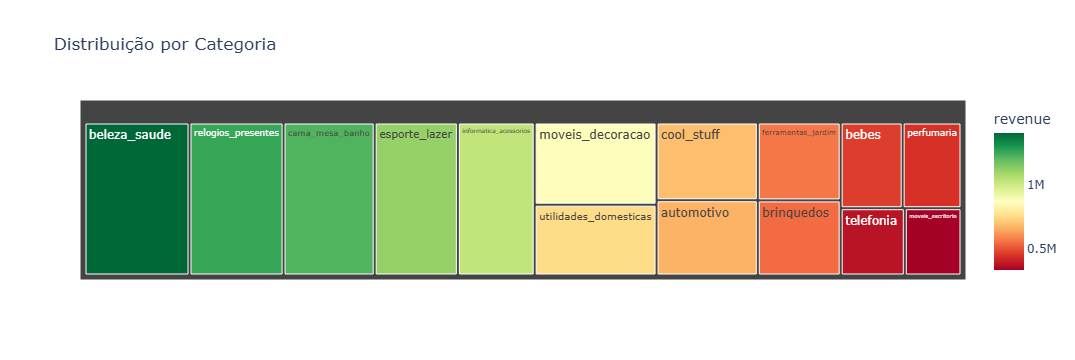

✓ Salvo: outputs/treemap_categorias.html


In [13]:
top15 = df.groupby('product_category_name')['revenue'].sum().sort_values(ascending=False).head(15).reset_index()

fig = px.treemap(top15, path=['product_category_name'], values='revenue',
                 title='Distribuição por Categoria',
                 color='revenue', color_continuous_scale='RdYlGn')
fig.write_html('../outputs/treemap_categorias.html')
fig.show()
print("✓ Salvo: outputs/treemap_categorias.html")

In [14]:
print("\n[8] KPIs finais...")

best_month_idx = monthly_sales['revenue'].idxmax()
best_month = monthly_sales.loc[best_month_idx, 'month_year'].strftime('%B/%Y')

kpis = {
    'Faturamento Total': f"R$ {total_revenue:,.2f}",
    'Ticket Médio': f"R$ {avg_ticket:,.2f}",
    'Total Pedidos': f"{total_orders:,}",
    'Produtos Únicos': f"{total_products:,}",
    'Margem Média': f"{df['profit_margin'].mean():.2f}%",
    'Melhor Mês': best_month,
    'Top Categoria': top_categories.index[0]
}

print("\n📋 KPIs:")
for k, v in kpis.items():
    print(f"   • {k}: {v}")


[8] KPIs finais...

📋 KPIs:
   • Faturamento Total: R$ 15,419,773.75
   • Ticket Médio: R$ 159.83
   • Total Pedidos: 96,478
   • Produtos Únicos: 32,216
   • Margem Média: 69.78%
   • Melhor Mês: November/2017
   • Top Categoria: beleza_saude


In [15]:
print("\n[9] Exportando...")

kpis_df = pd.DataFrame([kpis]).T.reset_index()
kpis_df.columns = ['KPI', 'Valor']
kpis_df.to_csv('../outputs/kpis.csv', index=False, encoding='utf-8-sig')

top_categories.reset_index().to_csv('../outputs/top_categorias.csv', encoding='utf-8-sig')

print("✓ KPIs exportados")
print("✓ Top categorias exportadas")


[9] Exportando...
✓ KPIs exportados
✓ Top categorias exportadas


In [18]:
html = f"""<!DOCTYPE html>
<html lang="pt-br">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<title>Dashboard | Olist Analytics</title>

<link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;600;700;800&display=swap" rel="stylesheet">
<link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.5.0/css/all.min.css" rel="stylesheet">

<style>
* {{
    margin: 0;
    padding: 0;
    box-sizing: border-box;
    font-family: 'Inter', sans-serif;
}}

body {{
    background: linear-gradient(135deg, #667eea, #764ba2);
    min-height: 100vh;
    padding: 50px 20px;
}}

.container {{
    max-width: 1200px;
    margin: auto;
    background: #fff;
    padding: 55px;
    border-radius: 20px;
    box-shadow: 0 25px 60px rgba(0,0,0,0.25);
    animation: fadeIn .8s ease;
}}

@keyframes fadeIn {{
    from {{ opacity:0; transform: translateY(20px); }}
    to {{ opacity:1; transform: translateY(0); }}
}}

header {{
    text-align: center;
    margin-bottom: 50px;
}}

header h1 {{
    font-size: 2.7em;
    color: #2c2c2c;
}}

header p {{
    margin-top: 10px;
    font-size: 1.1em;
    color: #666;
}}

.kpi-grid {{
    display: grid;
    grid-template-columns: repeat(auto-fit, minmax(220px, 1fr));
    gap: 28px;
    margin: 60px 0;
}}

.kpi-card {{
    background: linear-gradient(135deg, #667eea, #764ba2);
    padding: 32px 25px;
    border-radius: 16px;
    color: white;
    position: relative;
    overflow: hidden;
    transition: .4s;
    animation: slideUp .8s ease forwards;
}}

@keyframes slideUp {{
    from {{ opacity:0; transform: translateY(30px); }}
    to {{ opacity:1; transform: translateY(0); }}
}}

.kpi-card:hover {{
    transform: translateY(-6px) scale(1.02);
    box-shadow: 0 18px 40px rgba(0,0,0,.35);
}}

.kpi-icon {{
    position: absolute;
    top: 20px;
    right: 20px;
    font-size: 2.2em;
    opacity: .25;
}}

.kpi-title {{
    font-size: .95em;
    opacity: .9;
    margin-bottom: 8px;
}}

.kpi-value {{
    font-size: 2.1em;
    font-weight: 800;
}}

.section-title {{
    font-size: 1.9em;
    color: #667eea;
    margin-top: 70px;
}}

.links-grid {{
    margin-top: 35px;
    display: grid;
    grid-template-columns: repeat(auto-fit, minmax(230px, 1fr));
    gap: 22px;
}}

.chart-link {{
    background: #667eea;
    padding: 18px;
    text-align: center;
    color: white;
    text-decoration: none;
    border-radius: 12px;
    font-weight: 600;
    display: flex;
    justify-content: center;
    align-items: center;
    gap: 10px;
    transition: .35s;
}}

.chart-link i {{
    font-size: 1.2em;
}}

.chart-link:hover {{
    background: #764ba2;
    transform: scale(1.05);
    box-shadow: 0 10px 25px rgba(0,0,0,.35);
}}

footer {{
    text-align: center;
    margin-top: 80px;
    padding-top: 35px;
    border-top: 2px solid #eee;
}}

footer strong {{
    font-size: 1.15em;
}}

footer p {{
    margin-top: 8px;
    color: #555;
}}

@media(max-width:600px) {{
    .container {{
        padding: 35px 25px;
    }}
}}
</style>
</head>

<body>

<div class="container">

<header>
    <h1><i class="fa-solid fa-chart-line"></i> Análise de Vendas Olist</h1>
    <p>E-commerce brasileiro • Business Intelligence</p>
</header>

<section class="kpi-grid">

<div class="kpi-card">
    <i class="fa-solid fa-sack-dollar kpi-icon"></i>
    <div class="kpi-title">Faturamento Total</div>
    <div class="kpi-value">R$ {total_revenue:,.0f}</div>
</div>

<div class="kpi-card">
    <i class="fa-solid fa-cart-shopping kpi-icon"></i>
    <div class="kpi-title">Pedidos</div>
    <div class="kpi-value">{total_orders:,}</div>
</div>

<div class="kpi-card">
    <i class="fa-solid fa-receipt kpi-icon"></i>
    <div class="kpi-title">Ticket Médio</div>
    <div class="kpi-value">R$ {avg_ticket:.2f}</div>
</div>

<div class="kpi-card">
    <i class="fa-solid fa-box-open kpi-icon"></i>
    <div class="kpi-title">Produtos</div>
    <div class="kpi-value">{total_products:,}</div>
</div>

<div class="kpi-card">
    <i class="fa-solid fa-percent kpi-icon"></i>
    <div class="kpi-title">Margem Média</div>
    <div class="kpi-value">{df['profit_margin'].mean():.1f}%</div>
</div>

<div class="kpi-card">
    <i class="fa-solid fa-calendar-check kpi-icon"></i>
    <div class="kpi-title">Melhor Mês</div>
    <div class="kpi-value" style="font-size:1.25em;">{best_month}</div>
</div>

</section>

<h2 class="section-title"><i class="fa-solid fa-chart-pie"></i> Dashboards Interativos</h2>

<div class="links-grid">

<a href="dashboard_completo.html" class="chart-link" target="_blank">
<i class="fa-solid fa-layer-group"></i> Dashboard Completo
</a>

<a href="dashboard_evolucao.html" class="chart-link" target="_blank">
<i class="fa-solid fa-arrow-trend-up"></i> Evolução
</a>

<a href="dashboard_categorias.html" class="chart-link" target="_blank">
<i class="fa-solid fa-trophy"></i> Categorias
</a>

<a href="heatmap_vendas.html" class="chart-link" target="_blank">
<i class="fa-solid fa-fire"></i> Heatmap
</a>

<a href="treemap_categorias.html" class="chart-link" target="_blank">
<i class="fa-solid fa-tree"></i> Treemap
</a>

</div>

<footer>
<strong>Kaylan Izaac</strong>
<p><i class="fa-solid fa-envelope"></i> kaylanmtts@gmail.com</p>
<p><i class="fa-brands fa-linkedin"></i> linkedin.com/in/kaylanizaac</p>
</footer>

</div>

</body>
</html>"""


with open('../outputs/relatorio_completo.html', 'w', encoding='utf-8') as f:
    f.write(html)

print("\n" + "="*60)
print("✅ PROJETO CONCLUÍDO!")
print("="*60)
print("\nAbra: outputs/relatorio_completo.html")


✅ PROJETO CONCLUÍDO!

Abra: outputs/relatorio_completo.html
